In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/sumeet/Downloads/housing.csv')

In [3]:

# Split the single column into multiple columns
df = df[df.columns[0]].str.split(expand=True)

# Assign proper column names to the dataframe
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
1,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
2,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
3,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20
4,0.02985,0.00,2.180,0,0.4580,6.4300,58.70,6.0622,3,222.0,18.70,394.12,5.21,28.70
5,0.08829,12.50,7.870,0,0.5240,6.0120,66.60,5.5605,5,311.0,15.20,395.60,12.43,22.90
6,0.14455,12.50,7.870,0,0.5240,6.1720,96.10,5.9505,5,311.0,15.20,396.90,19.15,27.10
7,0.21124,12.50,7.870,0,0.5240,5.6310,100.00,6.0821,5,311.0,15.20,386.63,29.93,16.50
8,0.17004,12.50,7.870,0,0.5240,6.0040,85.90,6.5921,5,311.0,15.20,386.71,17.10,18.90
9,0.22489,12.50,7.870,0,0.5240,6.3770,94.30,6.3467,5,311.0,15.20,392.52,20.45,15.00


In [6]:
df['CHAS'].describe()

count     505
unique      2
top         0
freq      470
Name: CHAS, dtype: object

In [7]:
df = df.drop(columns=['CHAS'])

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  # Scale all features

# Convert the scaled array back to a pandas DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
df_scaled.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.417830,-0.486716,-0.596322,-0.739831,0.194934,0.366571,0.556897,-0.869801,-0.988107,-0.306327,0.441573,-0.494647,-0.101111
1,-0.417832,-0.486716,-0.596322,-0.739831,1.282481,-0.265790,0.556897,-0.869801,-0.988107,-0.306327,0.396984,-1.211048,1.323287
2,-0.417242,-0.486716,-1.310287,-0.834761,1.016288,-0.809337,1.076969,-0.754844,-1.106827,0.110267,0.416704,-1.363862,1.181934
3,-0.412977,-0.486716,-1.310287,-0.834761,1.228389,-0.510919,1.076969,-0.754844,-1.106827,0.110267,0.441573,-1.028793,1.486386
4,-0.417535,-0.486716,-1.310287,-0.834761,0.207745,-0.351052,1.076969,-0.754844,-1.106827,0.110267,0.411117,-1.045617,0.670891


In [10]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(df_scaled)

# Add outlier labels to dataset (-1 means anomaly, 1 means normal)
df_scaled['Anomaly'] = outlier_labels
print(df_scaled.head(10))


       CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0 -0.417830 -0.486716 -0.596322 -0.739831  0.194934  0.366571  0.556897   
1 -0.417832 -0.486716 -0.596322 -0.739831  1.282481 -0.265790  0.556897   
2 -0.417242 -0.486716 -1.310287 -0.834761  1.016288 -0.809337  1.076969   
3 -0.412977 -0.486716 -1.310287 -0.834761  1.228389 -0.510919  1.076969   
4 -0.417535 -0.486716 -1.310287 -0.834761  0.207745 -0.351052  1.076969   
5 -0.410739  0.049291 -0.479518 -0.265183 -0.387274 -0.070398  0.838708   
6 -0.404198  0.049291 -0.479518 -0.265183 -0.159516  0.977617  1.023922   
7 -0.396443  0.049291 -0.479518 -0.265183 -0.929624  1.116168  1.086420   
8 -0.401234  0.049291 -0.479518 -0.265183 -0.398662  0.615253  1.328623   
9 -0.394856  0.049291 -0.479518 -0.265183  0.132300  0.913670  1.212081   

        RAD       TAX   PTRATIO         B     LSTAT      MEDV  Anomaly  
0 -0.869801 -0.988107 -0.306327  0.441573 -0.494647 -0.101111        1  
1 -0.869801 -0.988107 -0.306

In [11]:
# Initialize the anomaly counter
anomalies = 0

# Iterate through the 'Anomaly' column to count anomalies
for value in df_scaled['Anomaly']:
    if value == -1:  # -1 indicates an anomaly
        anomalies += 1

print(f"Total anomalies: {anomalies}")



Total anomalies: 51


In [12]:
print(df_scaled[df_scaled['Anomaly'] == -1].head())

         CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
31  -0.259612 -0.486716 -0.440097 -0.144363 -0.475531  0.476702  0.092864   
140 -0.231630 -0.486716  1.567473  0.597814 -1.800801  1.116168 -1.118437   
141 -0.034839 -0.486716  1.230201  2.729416 -1.254181  1.116168 -1.174381   
143 -0.097782 -0.486716  1.230201  2.729416 -1.965926  1.038011 -1.162841   
144 -0.144340 -0.486716  1.230201  2.729416 -0.219302  1.116168 -1.128078   

          RAD       TAX   PTRATIO         B     LSTAT      MEDV  Anomaly  
31  -0.639888 -0.602265  1.174895 -1.358436  2.108790 -1.014465       -1  
140 -0.639888  0.169418  1.267472  0.441573  3.048103 -0.883985       -1  
141 -0.524931 -0.032407 -1.741261  0.441573  1.984016 -0.992718       -1  
143 -0.524931 -0.032407 -1.741261  0.441573  2.330300 -1.166690       -1  
144 -0.524931 -0.032407 -1.741261 -2.012378  2.121408 -0.949225       -1  


In [13]:
df_scaled.shape

(505, 14)

In [14]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 4
pca = PCA(n_components=4)
principal_components = pca.fit_transform(X_scaled)

# Convert results into a DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
print(pca_df.head())  # Print first few rows


        PC1       PC2       PC3       PC4
0 -1.378386 -0.192985 -0.997962  0.062742
1 -2.380675  1.111020 -0.374933  0.703808
2 -2.842276  0.368116 -0.066707  1.022326
3 -2.777272  0.622606 -0.116235  0.995066
4 -2.305893 -0.279860 -0.451980  0.671033


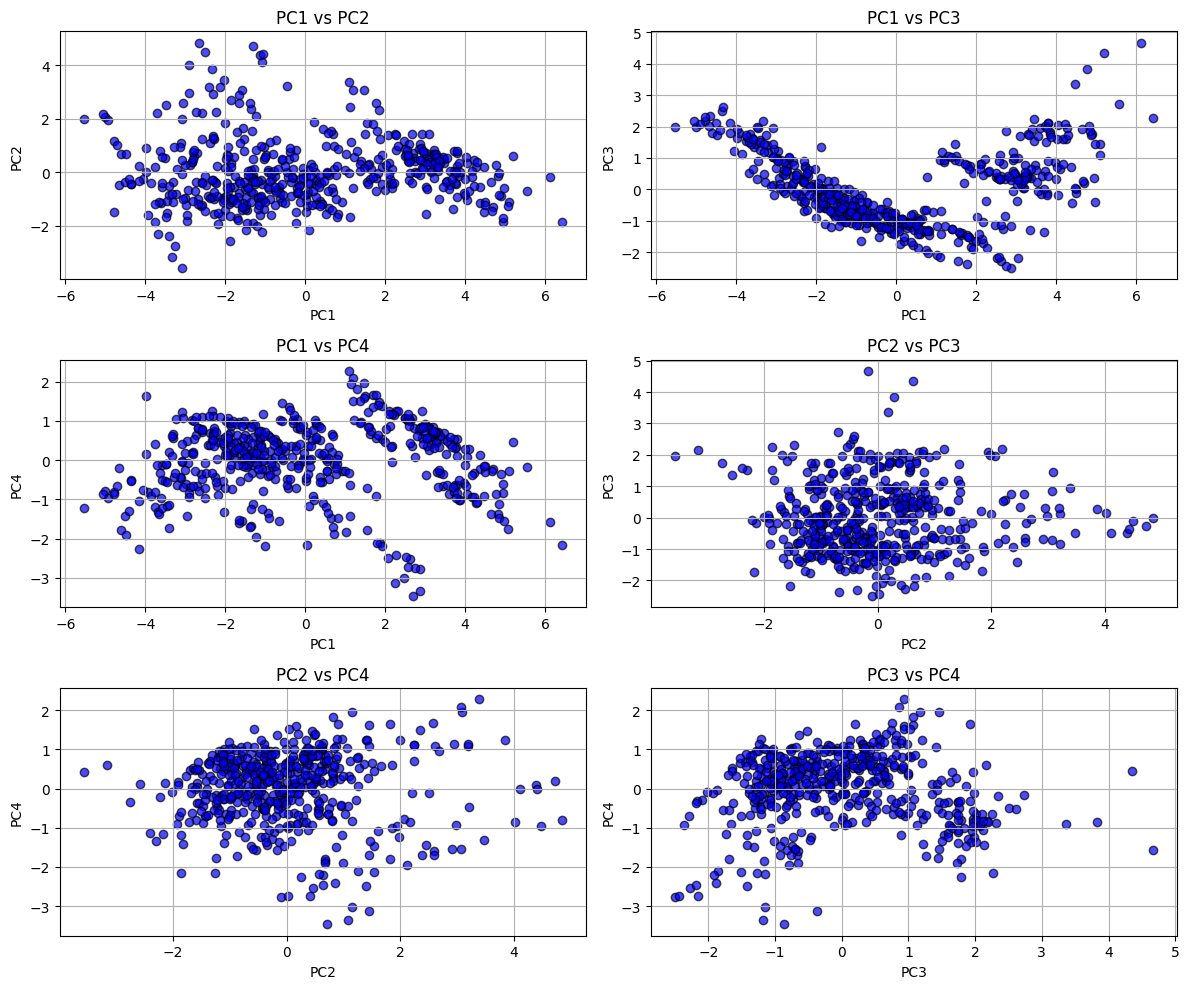

In [15]:
import matplotlib.pyplot as plt
from itertools import combinations

# Define all combinations of principal components
pc_combinations = list(combinations(['PC1', 'PC2', 'PC3', 'PC4'], 2))

# Plot all combinations of PC pairs
plt.figure(figsize=(12, 10))
for i, (pc_x, pc_y) in enumerate(pc_combinations, 1):
    plt.subplot(3, 2, i)
    plt.scatter(pca_df[pc_x], pca_df[pc_y], c='blue', edgecolors='black', alpha=0.7)
    plt.xlabel(pc_x)
    plt.ylabel(pc_y)
    plt.title(f'{pc_x} vs {pc_y}')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [16]:
# Explained variance ratio for the 4 components
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained Variance by PC2: {explained_variance[1]:.2f}")
print(f"Explained Variance by PC3: {explained_variance[2]:.2f}")
print(f"Explained Variance by PC4: {explained_variance[3]:.2f}")
print(f"Total Variance Retained (4 PCs): {sum(explained_variance):.2f}")


Explained Variance by PC1: 0.50
Explained Variance by PC2: 0.12
Explained Variance by PC3: 0.10
Explained Variance by PC4: 0.07
Total Variance Retained (4 PCs): 0.79


In [17]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 6
pca = PCA(n_components=6)
principal_components = pca.fit_transform(X_scaled)

# Convert results into a DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6'])
print(pca_df.head())  # Print first few rows

        PC1       PC2       PC3       PC4       PC5       PC6
0 -1.378386 -0.192985 -0.997962  0.062742 -0.396042  0.582365
1 -2.380675  1.111020 -0.374933  0.703808 -0.634772  0.516242
2 -2.842276  0.368116 -0.066707  1.022326 -0.794508  0.626626
3 -2.777272  0.622606 -0.116235  0.995066 -0.753006  0.716747
4 -2.305893 -0.279860 -0.451980  0.671033 -0.642409  0.647229


In [18]:
# Explained variance ratio for the 4 components
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained Variance by PC2: {explained_variance[1]:.2f}")
print(f"Explained Variance by PC3: {explained_variance[2]:.2f}")
print(f"Explained Variance by PC4: {explained_variance[3]:.2f}")
print(f"Explained Variance by PC5: {explained_variance[4]:.2f}")
print(f"Explained Variance by PC6: {explained_variance[5]:.2f}")
print(f"Total Variance Retained (6 PCs): {sum(explained_variance):.2f}")

Explained Variance by PC1: 0.50
Explained Variance by PC2: 0.12
Explained Variance by PC3: 0.10
Explained Variance by PC4: 0.07
Explained Variance by PC5: 0.05
Explained Variance by PC6: 0.04
Total Variance Retained (6 PCs): 0.88


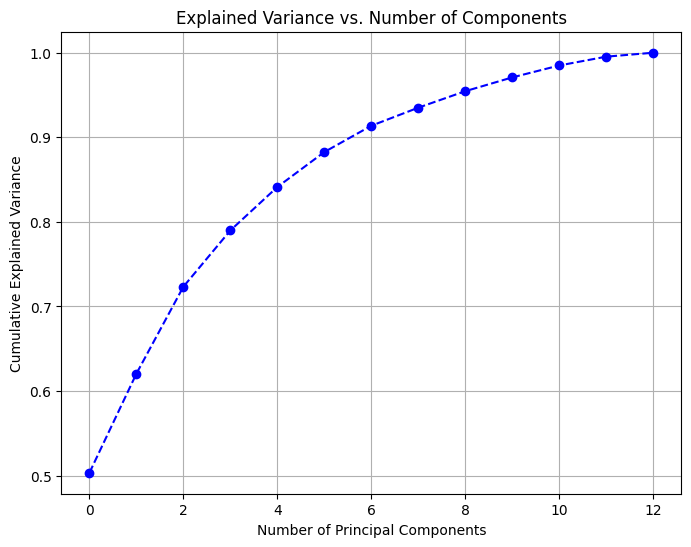

In [19]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy to fix the NameError

# Apply PCA with all components
pca_full = PCA(n_components=13)
pca_full.fit(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [20]:
# Compute correlation
# Compute correlation of "TAX" with all other columns
tax_correlation = df_scaled.corr()['TAX'].drop('TAX')  # Drop itself from the correlation list

# Print correlation values
print(tax_correlation)

CRIM       0.582568
ZN        -0.314351
INDUS      0.720561
NOX        0.668141
RM        -0.291680
AGE        0.506527
DIS       -0.534492
RAD        0.910202
PTRATIO    0.460100
B         -0.441505
LSTAT      0.543435
MEDV      -0.468543
Anomaly   -0.101606
Name: TAX, dtype: float64


In [21]:
# Explained variance ratio for the 8 components
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained Variance by PC2: {explained_variance[1]:.2f}")
print(f"Explained Variance by PC3: {explained_variance[2]:.2f}")
print(f"Explained Variance by PC4: {explained_variance[3]:.2f}")
print(f"Explained Variance by PC5: {explained_variance[4]:.2f}")
print(f"Explained Variance by PC6: {explained_variance[5]:.2f}")
print(f"Explained Variance by PC7: {explained_variance[6]:.2f}")
print(f"Explained Variance by PC8: {explained_variance[7]:.2f}")
print(f"Total Variance Retained (6 PCs): {sum(explained_variance):.2f}")

Explained Variance by PC1: 0.50
Explained Variance by PC2: 0.12
Explained Variance by PC3: 0.10
Explained Variance by PC4: 0.07
Explained Variance by PC5: 0.05
Explained Variance by PC6: 0.04


IndexError: index 6 is out of bounds for axis 0 with size 6

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Get component loadings (weights)
loadings = principal_components

# Convert loadings to a DataFrame
loading_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=[f'Feature{i+1}' for i in range(loadings.shape[0])])

# Print loadings
print(loading_df)


                 PC1       PC2       PC3       PC4       PC5       PC6  \
Feature1   -1.378386 -0.192985 -0.997962  0.062742 -0.396042  0.582365   
Feature2   -2.380675  1.111020 -0.374933  0.703808 -0.634772  0.516242   
Feature3   -2.842276  0.368116 -0.066707  1.022326 -0.794508  0.626626   
Feature4   -2.777272  0.622606 -0.116235  0.995066 -0.753006  0.716747   
Feature5   -2.305893 -0.279860 -0.451980  0.671033 -0.642409  0.647229   
...              ...       ...       ...       ...       ...       ...   
Feature501 -0.307915  0.138928 -1.155213  1.016407 -0.663167  0.223242   
Feature502 -0.048767 -0.197959 -1.436538  0.891289 -0.518494  0.208518   
Feature503 -0.373007  0.895857 -1.204009  1.271492 -0.736040  0.345570   
Feature504 -0.269308  0.574088 -1.237649  1.146511 -0.719690  0.315396   
Feature505  0.189532 -0.693481 -1.525633  0.768790 -0.551497  0.197988   

                 PC7       PC8  
Feature1    0.293456 -0.199163  
Feature2   -0.073820  0.044225  
Feature3   -

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Simulated dataset with 14 features (replace with real data if available)
np.random.seed(42)
data = pd.DataFrame(np.random.rand(100, 14) * 10, columns=[f'Feature{i}' for i in range(1, 15)])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA with 4 components
pca = PCA(n_components=4)
principal_components = pca.fit_transform(data_scaled)

# Get correct PCA loadings (weights that show how much each feature contributes to each PC)
loadings = pca.components_  # Shape (n_components, n_features)

# Convert loadings to a DataFrame (correctly transposed to match original feature names)
df_loadings = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=data.columns)

# Get the names of the top contributing features for each principal component
top_features_per_pc = df_loadings.apply(lambda x: x.abs().nlargest(3).index.tolist(), axis=0)

# Convert to a dictionary for better readability
top_features_dict = {pc: features for pc, features in top_features_per_pc.items()}

# Print the mapping of PCs to original column names
print("Top Contributing Features for Each Principal Component:")
for pc, features in top_features_dict.items():
    print(f"{pc}: {features}")


Top Contributing Features for Each Principal Component:
PC1: 0    Feature7
1    Feature2
2    Feature6
Name: PC1, dtype: object
PC2: 0    Feature3
1    Feature6
2    Feature5
Name: PC2, dtype: object
PC3: 0    Feature9
1    Feature4
2    Feature1
Name: PC3, dtype: object
PC4: 0    Feature11
1     Feature9
2     Feature3
Name: PC4, dtype: object


In [ ]:
# Convert to dictionary with only lists of feature names (no Pandas Index objects)
top_feature_names_dict = {pc: list(features) for pc, features in top_features_dict.items()}

# Print clean dictionary with feature names
print(top_feature_names_dict)  # Print the keys of the dictionary
print(f"(df_scaled.columns.top_feature_names_dict)top_feature_names_dict")

{'PC1': ['Feature7', 'Feature2', 'Feature6'], 'PC2': ['Feature3', 'Feature6', 'Feature5'], 'PC3': ['Feature9', 'Feature4', 'Feature1'], 'PC4': ['Feature11', 'Feature9', 'Feature3']}
(df_scaled.columns.top_feature_names_dict)top_feature_names_dict


In [ ]:
# Extract the top contributing features for each principal component
top_feature_names_per_pc = df_loadings.apply(lambda x: x.abs().nlargest(3).index.tolist(), axis=0)

# Convert to a dictionary with clean feature names for each PC
top_feature_names_dict = {pc: list(features) for pc, features in top_feature_names_per_pc.items()}

# Print the dictionary with column names for each PC's top contributing features
print("Top Contributing Features for Each Principal Component:")
for pc, features in top_feature_names_dict.items():
    print(f"{pc}: {features}")


Top Contributing Features for Each Principal Component:
PC1: ['Feature7', 'Feature2', 'Feature6']
PC2: ['Feature3', 'Feature6', 'Feature5']
PC3: ['Feature9', 'Feature4', 'Feature1']
PC4: ['Feature11', 'Feature9', 'Feature3']


In [ ]:
df_scaled.head()


,CRIM,INDUS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.417830,-0.596322,-0.739831,0.366571,0.556897,-0.869801,-0.988107,-0.306327,0.441573,-0.494647,-0.101111
1,-0.417832,-0.596322,-0.739831,-0.265790,0.556897,-0.869801,-0.988107,-0.306327,0.396984,-1.211048,1.323287
2,-0.417242,-1.310287,-0.834761,-0.809337,1.076969,-0.754844,-1.106827,0.110267,0.416704,-1.363862,1.181934
3,-0.412977,-1.310287,-0.834761,-0.510919,1.076969,-0.754844,-1.106827,0.110267,0.441573,-1.028793,1.486386
4,-0.417535,-1.310287,-0.834761,-0.351052,1.076969,-0.754844,-1.106827,0.110267,0.411117,-1.045617,0.670891


In [ ]:


# Create a dictionary to map PCA features to their actual dataset column names
pca_feature_mapping = {f'Feature{i+1}': col_name for i, col_name in enumerate(df_scaled.columns)}

# Print the mapping
print("Mapping of FeatureX to Actual Dataset Column Names:")
print(pca_feature_mapping)


Mapping of FeatureX to Actual Dataset Column Names:
{'Feature1': 'CRIM', 'Feature2': 'INDUS', 'Feature3': 'NOX', 'Feature4': 'AGE', 'Feature5': 'DIS', 'Feature6': 'RAD', 'Feature7': 'TAX', 'Feature8': 'PTRATIO', 'Feature9': 'B', 'Feature10': 'LSTAT', 'Feature11': 'MEDV'}


In [ ]:
# Print the mapping in a straight column format
print("Mapping of PCA Features to Actual Dataset Column Names:\n")
for feature, column_name in pca_feature_mapping.items():
    print(f"{feature} -> {column_name}")

Mapping of PCA Features to Actual Dataset Column Names:

Feature1 -> CRIM
Feature2 -> INDUS
Feature3 -> NOX
Feature4 -> AGE
Feature5 -> DIS
Feature6 -> RAD
Feature7 -> TAX
Feature8 -> PTRATIO
Feature9 -> B
Feature10 -> LSTAT
Feature11 -> MEDV


#Top Contributing Features for Each Principal Component:
PC1: 0    Feature7
1    Feature2
2    Feature6
Name: PC1, dtype: object
PC2: 0    Feature3
1    Feature6
2    Feature5
Name: PC2, dtype: object
PC3: 0    Feature9
1    Feature4
2    Feature1
Name: PC3, dtype: object
PC4: 0    Feature11
1     Feature9
2     Feature3
Name: PC4, dtype: object

#correlation
CRIM       0.582568
ZN        -0.314351
INDUS      0.720561
NOX        0.668141
RM        -0.291680
AGE        0.506527
DIS       -0.534492
RAD        0.910202
PTRATIO    0.460100
B         -0.441505
LSTAT      0.543435
MEDV      -0.468543
Anomaly   -0.101606
Name: TAX, dtype: float64

#final contributors
PC1: Tax, Non-retail businesses (.72), accessiblity to radial highways (.9)
PC2: Nox concentration (.6), Radial highways (.9), distance to employment (-.5)
PC3: Proportion of blacks (-.44), age (.5), crime (.58)
PC4: median value (-.46), blacks (-.44), nox (.66)





In [ ]:
corr = df.corr()
print(corr)

             CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
CRIM     1.000000 -0.200283  0.406251  0.420934 -0.218978  0.352701 -0.379627   
ZN      -0.200283  1.000000 -0.534022 -0.516574  0.311835 -0.569524  0.664395   
INDUS    0.406251 -0.534022  1.000000  0.764556 -0.391330  0.645543 -0.708848   
NOX      0.420934 -0.516574  0.764556  1.000000 -0.302127  0.731461 -0.769221   
RM      -0.218978  0.311835 -0.391330 -0.302127  1.000000 -0.240211  0.205170   
AGE      0.352701 -0.569524  0.645543  0.731461 -0.240211  1.000000 -0.747872   
DIS     -0.379627  0.664395 -0.708848 -0.769221  0.205170 -0.747872  1.000000   
RAD      0.625396 -0.311717  0.594167  0.611758 -0.209277  0.456232 -0.494798   
TAX      0.582568 -0.314351  0.720561  0.668141 -0.291680  0.506527 -0.534492   
PTRATIO  0.289394 -0.391713  0.380955  0.188918 -0.355116  0.261724 -0.232561   
B       -0.384839  0.175319 -0.356506 -0.380006  0.127754 -0.273486  0.291451   
LSTAT    0.455329 -0.412894 

In [ ]:
# Print the top 5 absolute correlations with 'MEDV'
print(df.corr().abs().nlargest(5, 'MEDV').index)
print(df.corr().abs().nlargest(5, 'MEDV')['MEDV'].values)

Index(['MEDV', 'LSTAT', 'RM', 'PTRATIO', 'INDUS'], dtype='object')
[1.         0.73818723 0.69536452 0.50841081 0.48412584]


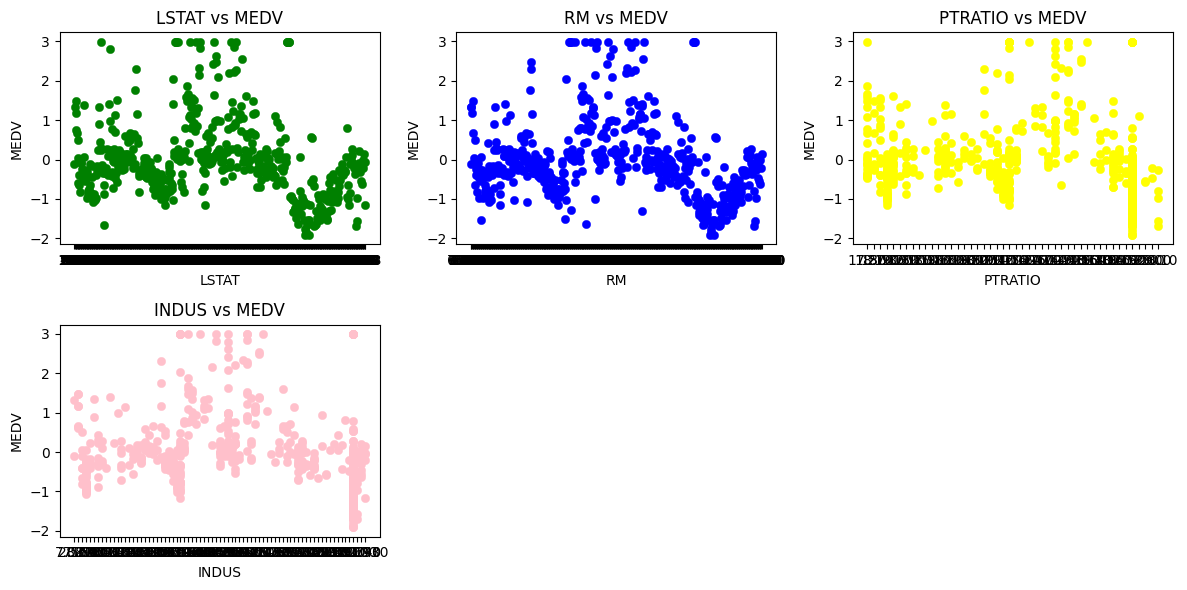

In [ ]:
Index = ['LSTAT', 'RM', 'PTRATIO', 'INDUS']
Color = ['green', 'blue', 'yellow', 'pink', 'teal']
fig, axes = plt.subplots(2, 3, figsize=(12, 6))  # Create a grid of subplots

for ax, feature, color in zip(axes.flatten(), Index, Color):
	ax.scatter(df_scaled[feature], df_scaled['MEDV'], marker='o', color=color, linewidth=.3)  # Scatter plot for each feature
	ax.set_xlabel(feature)  # Set x-axis label
	ax.set_ylabel('MEDV')  # Set y-axis label
	ax.set_title(f'{feature} vs MEDV')  # Set title for each subplot

# Hide any unused axes
for j in range(len(Index), len(axes.flatten())):
   fig.delaxes(axes.flatten()[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plots

In [31]:
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT', 'RM'])
Y = df['MEDV']

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=5)
print(x_train.shape)
print(Y_train.shape)
print()
print(x_test.shape)
print(Y_test.shape)

(353, 2)
(353,)

(152, 2)
(152,)


In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)

price_pred = model.predict(x_test)
print('R-Squared: %.4f' % model.score(x_test, Y_test))

R-Squared: 0.6333


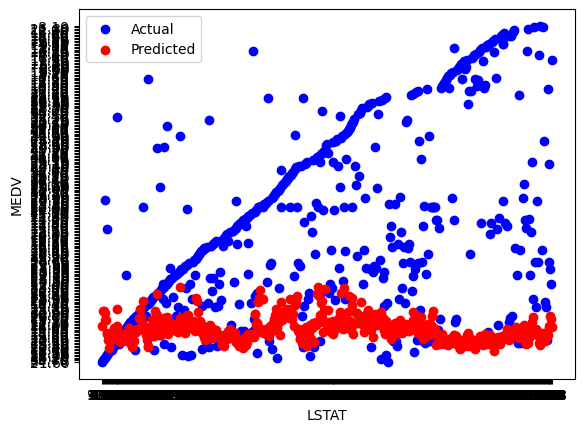

R-Squared: 0.7579


In [33]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression  # Import LinearRegression

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns =['LSTAT', 'RM'])
y = df['MEDV']

# Generate polynomial features
poly = PolynomialFeatures(degree=2)  # You can change the degree as needed
x_poly = poly.fit_transform(x)  # Ensure x is defined in the notebook

# Fit the model
model = LinearRegression()
model.fit(x_poly, Y)  # Use the correct variable 'Y'

# Predict and plot
y_poly_pred = model.predict(x_poly)
plt.scatter(x['LSTAT'], Y, color='blue', label='Actual')  # Use 'LSTAT' for x-axis
plt.scatter(x['LSTAT'], y_poly_pred, color='red', label='Predicted')  # Use 'LSTAT' for x-axis
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.show()

print('R-Squared: %.4f' % model.score(x_poly, y))

In [ ]:
# Create an instance of PolynomialFeatures with training and then test data
poly = PolynomialFeatures()

# Transform the training and testing data
x_train_poly = poly.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_poly, Y_train)

x_test_poly = poly.fit_transform(x_test)


print('R-Squared: %.4f' % model.score(x_test_poly, Y_test))

R-Squared: 0.7637
